In [2]:
import numpy as np
import matplotlib.pyplot as plt

## ***3. Isocontours of Gaussian Distributions***

In [3]:
def compute_gauss_matrix(m,s,x,y):
    """Input: m and s are the Gaussian parameters. x and y compose a grid of points."""
    """For each point (x_i,y_i), we compute the Gaussian pdf and return the output z_i"""

    z = np.empty_like(x).astype(float)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            data_pt = np.array([x[i][j], y[i][j]])
            numer = np.exp(-0.5 * (data_pt-m).T @ (np.linalg.inv(s) @ (data_pt-m))) # e^( - 1/2 * (x-mu)T * S^-1 * (x-mu))
            denom = np.sqrt((2 * np.pi) ** 2 * np.linalg.det(s)) # sqrt((2pi)**2 * det(sigma))
            z_pt = numer / denom
            z[i][j] = z_pt
            
    return z

**1. $f(\mu, \Sigma)$, where $\mu = \begin{bmatrix}1 \\ 1 \end{bmatrix}$ and $\Sigma = \begin{bmatrix}1 & 0 \\ 0 & 2\end{bmatrix}$.**

<a list of 14 text.Text objects>

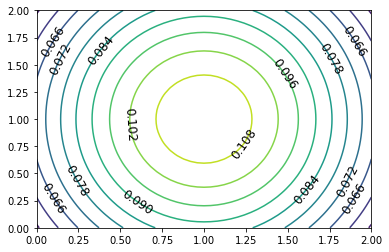

In [4]:
mu, sigma = np.asarray([1, 1]), np.array([[1, 0],[0, 2]])
X, Y = np.meshgrid(np.linspace(mu[0]-1, mu[0]+1, 51), np.linspace(mu[0]-1, mu[1]+1, 51))

Z = compute_gauss_matrix(mu, sigma,X,Y)
p = plt.contour(X, Y, Z, 10)
plt.clabel(p, inline=False, fontsize=12, colors = 'black')

**2. $f(\mu, \Sigma)$, where $\mu = \begin{bmatrix}-1 \\ 2 \end{bmatrix}$ and $\Sigma = \begin{bmatrix}2 & 1 \\ 1 & 4\end{bmatrix}$.**

<a list of 12 text.Text objects>

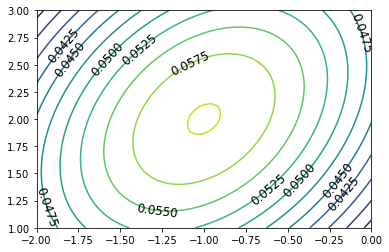

In [5]:
mu, sigma = np.asarray([-1, 2]), np.array([[2, 1],[1, 4]])
X, Y = np.meshgrid(np.linspace(mu[0]-sigma[0][1], mu[0]+sigma[0][1], 51), np.linspace(mu[1]-sigma[0][1], mu[1]+sigma[0][1], 51))

Z = compute_gauss_matrix(mu, sigma,X,Y)
p = plt.contour(X, Y, Z, 10)
plt.clabel(p, inline=False, fontsize=12, colors = 'black')

**3. $f(\mu_1, \Sigma) - f(\mu_2, \Sigma)$, where $\mu_1 = \begin{bmatrix}0 \\ 2 \end{bmatrix}$, $\mu_2 = \begin{bmatrix}2 \\ 0 \end{bmatrix}$, and $\Sigma = \begin{bmatrix}1 & 0 \\ 0 & 2\end{bmatrix}$.**

<a list of 10 text.Text objects>

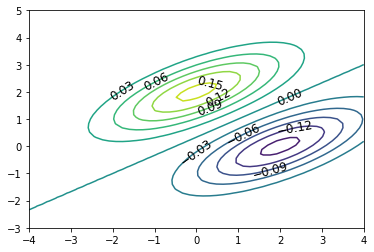

In [6]:
mu_1 = np.asarray([0, 2])
mu_2 = np.asarray([2,0])
sigma = np.array([[2, 1],[1, 1]])
X, Y = np.meshgrid(np.linspace(mu[0]-3*sigma[0][1], mu[0]+5*sigma[0][1], 51), np.linspace(mu[1]-5*sigma[0][1], mu[1]+3*sigma[0][1], 51))

Z_1 = compute_gauss_matrix(mu_1, sigma, X , Y)
Z_2 = compute_gauss_matrix(mu_2, sigma, X, Y)
p = plt.contour(X, Y, Z_1 - Z_2, 10)
plt.clabel(p, inline=False, fontsize=12, colors = 'black')

**4. $f(\mu_1, \Sigma_1) - f(\mu_2, \Sigma_2)$, where $\mu_1 = \begin{bmatrix}0 \\ 2 \end{bmatrix}$, $\mu_2 = \begin{bmatrix}2 \\ 0 \end{bmatrix}$, $\Sigma_1 = \begin{bmatrix}2 & 1 \\ 1 & 1\end{bmatrix}$, and $\Sigma_2 = \begin{bmatrix}2 & 1 \\ 1 & 4\end{bmatrix}$.**

<a list of 10 text.Text objects>

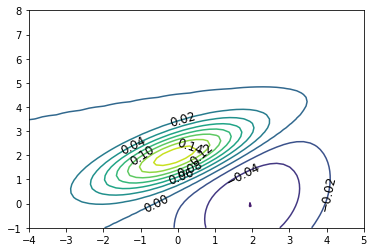

In [7]:
mu_1 = np.asarray([0, 2])
mu_2 = np.asarray([2,0])
sigma_1 = np.array([[2, 1],[1, 1]])
sigma_2 = np.array([[2,1],[1,4]])
X, Y = np.meshgrid(np.linspace(mu[0]-3*sigma[0][1], mu[0]+6*sigma[0][1], 51), np.linspace(mu[1]-3*sigma[0][1], mu[1]+6*sigma[0][1], 51))

Z_1 = compute_gauss_matrix(mu_1, sigma_1, X , Y)
Z_2 = compute_gauss_matrix(mu_2, sigma_2, X, Y)
p = plt.contour(X, Y, Z_1 - Z_2, 10)
plt.clabel(p, inline=False, fontsize=12, colors = 'black')

**5. $f(\mu_1, \Sigma_1) - f(\mu_2, \Sigma_2)$, where $\mu_1 = \begin{bmatrix}1 \\ 1 \end{bmatrix}$, $\mu_2 = \begin{bmatrix}-1 \\ -1 \end{bmatrix}$, $\Sigma_1 = \begin{bmatrix}2 & 0 \\ 0 & 1\end{bmatrix}$, and $\Sigma_2 = \begin{bmatrix}2 & 1 \\ 1 & 2\end{bmatrix}$.**

<a list of 8 text.Text objects>

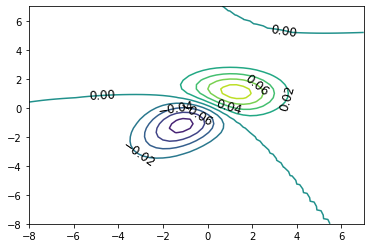

In [8]:
mu_1 = np.asarray([1,1])
mu_2 = np.asarray([-1,-1])
sigma_1 = np.array([[2, 0],[0, 1]])
sigma_2 = np.array([[2,1],[1,2]])

X, Y = np.meshgrid(np.linspace(mu_1[0] - mu_2[0] - 10, mu_1[0] - mu_2[0] + 5, 51), 
                    np.linspace(mu_1[1] - mu_2[1] - 10, mu_1[1] - mu_2[1] + 5, 51))

Z_1 = compute_gauss_matrix(mu_1, sigma_1, X , Y)
Z_2 = compute_gauss_matrix(mu_2, sigma_2, X, Y)
p = plt.contour(X, Y, Z_1 - Z_2, 10)
plt.clabel(p, inline=False, fontsize=12, colors = 'black')

## ***4. Eigenvectors of the Gaussian Covariance Matrix***


In [9]:
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence

rs = RandomState(MT19937(SeedSequence(69420)))

X_1 = rs.normal(3, 3, 100)
X_2 = np.empty_like(X_1).astype(float)
for i in range(X_1.shape[0]):
    X_2 = rs.normal(4, 2, 100) + 0.5 * X_1

X_1 = X_1.reshape((X_1.shape[0], 1))
X_2 = X_2.reshape((X_2.shape[0], 1))

X = np.hstack((X_1, X_2))

**1. Find the mean in ($R^2$) of the sample.**

In [10]:
X_mu = np.mean(X,axis=0)
X_mu

array([2.76916189, 5.24308424])

**2. Compute the 2x2 covariance matrix of the sample.**

In [11]:
X_covar = np.cov(X.T)
X_covar

array([[8.73890363, 4.03970734],
       [4.03970734, 6.18340679]])

**3. Compute the eigenvectors and eigenvalues of this covariance matrix.**

In [12]:
covar_eigvals, covar_eigvecs = np.linalg.eig(X_covar)
print(f"Here are the eigenvalues of the covariance matrix: {covar_eigvals}")
print("Here is the eigenbasis (normalized eigenvectors) of the covariance matrix:")
print(covar_eigvecs)


Here are the eigenvalues of the covariance matrix: [11.69812068  3.22418974]
Here is the eigenbasis (normalized eigenvectors) of the covariance matrix:
[[ 0.80671296 -0.59094349]
 [ 0.59094349  0.80671296]]


**4. On a two-dimensional grid with a horizontal axis for $X_1$ with range [-15, 15] and a vertical axis for $X_2$ with range [-15, 15], plot**

**i. all $n=100$ data points, and**

**ii. arrows representing both covariance eigenvectors. The eigenvector arrows should originate at the mean and have magnitudes equal to their corresponding eigenvalues.**

The magnitude of eigenvector 1, 11.69812067707414, is equal to its corresponding eigenvalue, 11.69812067707414
The magnitude of eigenvector 2, 3.224189736737576, is equal to its corresponding eigenvalue, 3.224189736737576


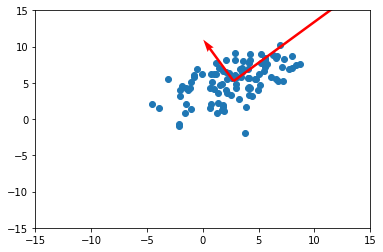

In [13]:
plt.scatter(X_1, X_2)
plt.axis([-15, 15, -15, 15])

origin = X_mu
eigvec_1 = covar_eigvecs[:,0] * covar_eigvals[0]
eigvec_2 = covar_eigvecs[:,1] * covar_eigvals[1]

plt.quiver(*origin, *eigvec_1, color=['r'], scale=21)
plt.quiver(*origin, *eigvec_2, color=['r'], scale=21)

norm_1 = np.linalg.norm(covar_eigvecs[:,1] * covar_eigvals[0])
norm_2 = np.linalg.norm(covar_eigvecs[:,1] * covar_eigvals[1])
# check
print(f"The magnitude of eigenvector 1, {norm_1}, is equal to its corresponding eigenvalue, {covar_eigvals[0]}")
print(f"The magnitude of eigenvector 2, {norm_2}, is equal to its corresponding eigenvalue, {covar_eigvals[1]}")

plt.show()

**5. Let $U = [v_1, v_2]$ be a 2 x 2 matrix whose columns are the $\textbf{unit}$ eigenvectors of the covariance matrix, where $v_1$ is the eigenvector with the larger eigenvalue. We use $U^{T}$ as a rotation matrix to rotate each sample point from the ($X_1, X_2$) coordinate system to a coordinate system aligned with the eigenvectors. Center your sample points by subtracting the mean $\mu$ from each point; then rotate each point by $U^T$, gaiving $x_{rotated} = U^{T}(x - \mu)$. Plot these rotated points on a new two-dimensional grid, again with both axes having range [-15, 15].**

(-15.0, 15.0, -15.0, 15.0)

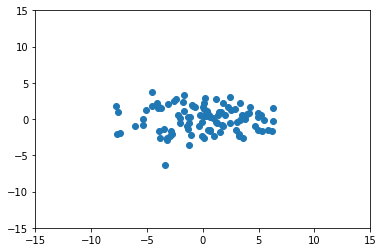

In [14]:
X_centered = np.empty_like(X).astype(float)
for i in range(100):
    X_centered[i][:] = X[i][:] - X_mu
X_centered.shape

X_rotated = X_centered @ covar_eigvecs
plt.scatter(X_rotated[:,0], X_rotated[:,1])
plt.axis([-15, 15, -15, 15])

## ***8. Gaussian Classifiers for Digits and Spam***

In [15]:
import numpy as np
import scipy as sp
from scipy import io
from scipy import stats
import pandas as pd
from sklearn.metrics import accuracy_score

First, we will load the MNIST data and hoild out 10,000 randomly chosen training points for a validation set.

In [16]:
mnist = io.loadmat("data/%s_data.mat" % "mnist") # load the mnist data

# separate into training data, training labels, and testing data
mnist_raw_training_data = mnist["training_data"] 
mnist_training_labels = mnist["training_labels"]
mnist_test_data = mnist["test_data"]

mnist_tuples = np.append(mnist_raw_training_data, mnist_training_labels, axis=1)
mnist_tuples_shuffled = np.random.permutation(mnist_tuples)

# In order to partition our data, we will use pandas; we will convert our numpy array into a temporary 
# dataframe and set aside the first 10,000 shuffled tuples, which will then be separated back into
# training data and training labels, to the validation set. Then we will assign the remainder, again 
# separating the training data and training labels to the training set.

mnist_validation_data = mnist_tuples_shuffled[0:10000, 0:-1]
mnist_validation_labels = mnist_tuples_shuffled[0:10000, -1]
mnist_training_data = mnist_tuples_shuffled[10000:, 0:-1]
mnist_training_labels = mnist_tuples_shuffled[10000:, -1]

**For whatever reason (I didn't have enough time, lmao), I decided not to vectorize contrast_normalizing an image and apply it to the data. I just wrote two separate functions, one that contrast-normalizes the entire training set and one that contrast-normalizes one image at a time.**

**8.1. The mean and covariance matrix for each class is returned by the build_gaussians function.**

**8.2. The LDA function will output the covariance matrix for the digit 0. We can see that the diagonal terms are greater than the off-diagonal terms, but not by much. We can conclude that our eigenvalues are very small values, so we may be dealing with a singular covariance matrix.**

In [41]:
def lda_predict(training_size, training_data, training_labels, testing_data, num_c, mnist=True):
    num_classes = num_c
    def contrast_normalize_data(d):
        """Contrast-normalize an entire set of images"""
        c_n_data = np.empty_like(d).astype(float)
        for i in range(d.shape[0]):
            norm = np.linalg.norm(d[i, :])
            if norm == 0:
                c_n_data[i,:] = d[i,:]
            else:
                c_n_data[i,:] = d[i,:] / np.linalg.norm(d[i, :])
        return c_n_data

    def contrast_normalize_point(image):
        """Contrast-normalize a single image"""
        norm = np.linalg.norm(image)
        return image / norm

    def separate_data_by_digit(data,labels):    
        """Returns an array where each index contains data corresponding to index-matching digit
        Uses a pandas dataframe to neatly separate data by digits"""
        merged = pd.DataFrame(np.hstack((data, labels.reshape((data.shape[0], 1))))) # We will combine the training data and their corresponding training labels
        data_by_digit = [merged[merged[merged.columns[-1]] == i].iloc[: , :-1].to_numpy().astype(float) for i in range(num_classes)] # separate data by their digit label, then remove the labels, then ensure types are float when converting back to numpy
        return data_by_digit

    def build_gaussians(data_by_d):
        """Returns an array where each index contains a 2-element array representing mu and Sigma,
        the parameters of the digit-conditional Gaussian distributions """
        gaussians = [0] * num_classes
        for i in range(num_classes):
            mu = np.mean(data_by_d[i], axis=0)
            sigma = np.cov(data_by_d[i].T)
            gaussians[i] = [mu, sigma]
        return gaussians
    
    def predict_point(image, gaussians, pinv):
        def compute_log_gaussian(x,mu, pinv):
            centered = x - mu
            product = np.dot(centered, pinv @ centered)
            return (-0.5 * product)

        discriminant_vals = [0] * num_classes
        if mnist==True:
            image = contrast_normalize_point(image)
        for i in range(num_classes):
            # discriminant_vals[i] = np.log(counts[i] / sum(counts)) + mv.logpdf(x=c_n_image, mean=gaussians[i][0], cov=pooled_sigma, allow_singular=True)
            discriminant_vals[i] = np.log(counts[i] / sum(counts)) + compute_log_gaussian(image, gaussians[i][0], pinv)
        return np.argmax(discriminant_vals)


    # Training Phase ~ Model Gaussians
    training_set = training_data[:training_size,:]
    training_labels = training_labels[:training_size]
    if mnist==True:
        training_set = contrast_normalize_data(training_set)
    training_set_by_digits_arr =  separate_data_by_digit(training_set,training_labels)
    gaussian_params_by_digits_arr = build_gaussians(training_set_by_digits_arr)
    plt.imshow(gaussian_params_by_digits_arr[0][1])

    # Testing Phase ~ Solve for Determinants
    counts = np.unique(training_labels, return_counts=True)[1] # arr to hold counts of each digit using training labels
    pooled_sigma = sum(gaussian_params_by_digits_arr[i][1] for i in range(num_classes)) / num_classes
    slogdet = np.linalg.slogdet(pooled_sigma)
    pseudo_inv_sigma = np.linalg.pinv(pooled_sigma)
    return [predict_point(testing_data[i,:],gaussian_params_by_digits_arr,pseudo_inv_sigma) for i in range(testing_data.shape[0])]


In [42]:
def qda_predict(training_size, training_data, training_labels, testing_data, num_c, mnist=True):
    num_classes = num_c
    def contrast_normalize_data(d):
        """Contrast-normalize an entire set of images"""
        c_n_data = np.empty_like(d).astype(float)
        for i in range(d.shape[0]):
            norm = np.linalg.norm(d[i, :])
            if norm == 0:
                c_n_data[i,:] = d[i,:]
            else:
                c_n_data[i,:] = d[i,:] / np.linalg.norm(d[i, :])
        return c_n_data

    def contrast_normalize_point(image):
        """Contrast-normalize a single image"""
        norm = np.linalg.norm(image)
        return image / norm

    def separate_data_by_digit(data,labels):    
        """Returns an array where each index contains data corresponding to index-matching digit
        Uses a pandas dataframe to neatly separate data by digits"""
        merged = pd.DataFrame(np.hstack((data, labels.reshape((data.shape[0], 1))))) # We will combine the training data and their corresponding training labels
        data_by_digit = [merged[merged[merged.columns[-1]] == i].iloc[: , :-1].to_numpy().astype(float) for i in range(num_classes)] # separate data by their digit label, then remove the labels, then ensure types are float when converting back to numpy
        return data_by_digit

    def build_gaussians(data_by_d):
        """Returns an array where each index contains a 2-element array representing mu and Sigma,
        the parameters of the digit-conditional Gaussian distributions """
        gaussians = [0] * num_classes
        for i in range(num_classes):
            mu = np.mean(data_by_d[i], axis=0)
            sigma = np.cov(data_by_d[i].T)
            gaussians[i] = [mu, sigma]
        return gaussians
    
    def predict_point(image, gaussians, pinvs):
        def compute_log_gaussian(x,mu, pinv):
            centered = x - mu
            product = np.dot(centered, pinv @ centered)
            return (-0.5 * product)

        discriminant_vals = [0] * num_classes
        if (mnist == True):
            image = contrast_normalize_point(image)
        for i in range(num_classes):
            # discriminant_vals[i] = np.log(counts[i] / sum(counts)) + mv.logpdf(x=c_n_image, mean=gaussians[i][0], cov=pooled_sigma, allow_singular=True)
            discriminant_vals[i] = np.log(counts[i] / sum(counts)) + compute_log_gaussian(image, gaussians[i][0], pinvs[i])
        return np.argmax(discriminant_vals)


    # Training Phase ~ Model Gaussians
    training_set = training_data[:training_size,:]
    training_labels = training_labels[:training_size]
    if mnist == True:
        training_set = contrast_normalize_data(training_set)
    training_set_by_digits_arr =  separate_data_by_digit(training_set,training_labels)
    gaussian_params_by_digits_arr = build_gaussians(training_set_by_digits_arr)
    # plt.imshow(gaussian_params_by_digits_arr[9][1])

    # Testing Phase ~ Solve for Determinants
    counts = np.unique(training_labels, return_counts=True)[1] # arr to hold counts of each digit using training labels
    # pooled_sigma = sum(gaussian_params_by_digits_arr[i][1] for i in range(10)) / 10
    # slogdet = np.linalg.slogdet(pooled_sigma)
    pseudo_inv_sigmas = [np.linalg.pinv(gaussian_params_by_digits_arr[i][1]) for i in range(num_classes)]
    return [predict_point(testing_data[i,:],gaussian_params_by_digits_arr,pseudo_inv_sigmas) for i in range(testing_data.shape[0])]


**8.3(a) and (b). Below are the error rates over different numbers of randomly chosen training points.**

**3(c). LDA performed better. Over the larger training sizes, LDA consistently had lower error scores than QDA. Also, LDA had less variance over smaller training sizes than QDA did.**

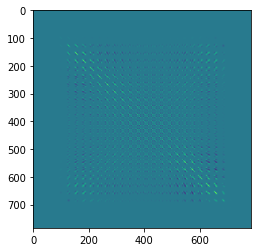

In [19]:
training_sizes = [100,200,500,1000,2000,5000,10000,30000,50000]
mnist_lda_error_rates = [1 - accuracy_score(mnist_validation_labels, lda_predict(n, mnist_training_data, mnist_training_labels, mnist_validation_data, 10)) for n in training_sizes]
mnist_qda_error_rates = [1 - accuracy_score(mnist_validation_labels, qda_predict(i, mnist_training_data, mnist_training_labels, mnist_validation_data, 10)) for i in training_sizes]

Text(0.5, 0, 'Training Sizes')

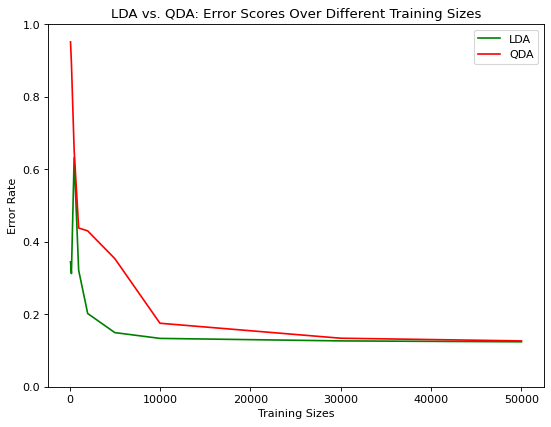

In [20]:
plt.figure(figsize=(8,6), dpi=80)
plt.plot(training_sizes, mnist_lda_error_rates, color='green', label='LDA')
plt.plot(training_sizes, mnist_qda_error_rates, color='red', label='QDA')
plt.legend(loc='upper right')
plt.title("LDA vs. QDA: Error Scores Over Different Training Sizes")
plt.ylim(0,1)
plt.ylabel("Error Rate")
plt.xlabel("Training Sizes")

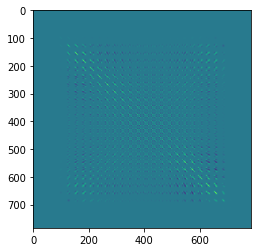

In [21]:
lda_predictions = [lda_predict(n, mnist_training_data, mnist_training_labels, mnist_validation_data, 10) for n in training_sizes]
qda_predictions = [qda_predict(n, mnist_training_data, mnist_training_labels, mnist_validation_data, 10) for n in training_sizes]

In [22]:
def digitwise_error_score_by_training_data(predictions):
    tbl = np.empty((len(training_sizes), 10))
    for k in range(len(training_sizes)):
        digitwise = [0] * 10
        for i in range(10):
            predictions_by_digit = np.empty((1,2))
            for j in range(len(mnist_validation_labels)):
                if mnist_validation_labels[j] == i:
                    pair = np.array([mnist_validation_labels[j], predictions[k][j]]).reshape(1,2)
                    predictions_by_digit = np.vstack((predictions_by_digit, pair))
            digitwise[i] = predictions_by_digit[1:,:]    
        accuracy_score_digitwise = [1 - accuracy_score(p[:,0], p[:,1]) for p in digitwise]
        if k == 0:
            tbl = np.asarray(accuracy_score_digitwise).reshape(1,10)
        else:
            tbl = np.vstack((tbl, np.asarray(accuracy_score_digitwise).reshape(1,10)))
    return tbl        

**3(d). Below are the plots of validation error vs. # of training points for each digit. It appears 0 is consistently the easiest to classify (#1 for LDA, #2 for QDA).**

Text(0.5, 0, 'Training Sizes')

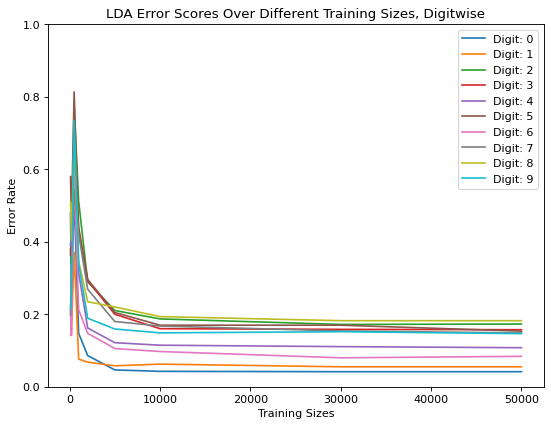

In [23]:
from matplotlib.pylab import figure

plt.figure(figsize=(8,6), dpi=80)
digitwise_sizewise_scores = digitwise_error_score_by_training_data(lda_predictions)
for j in range(digitwise_sizewise_scores.shape[1]):
    size_column = np.asarray(training_sizes)
    pts = np.hstack((size_column.reshape(9,1), digitwise_sizewise_scores[:,j].reshape(9,1)))
    plt.plot(pts[:,0], pts[:,1], label="Digit: " + str(j))
plt.legend(loc="upper right")
plt.title("LDA Error Scores Over Different Training Sizes, Digitwise")
plt.ylim(0,1)
plt.ylabel("Error Rate")
plt.xlabel("Training Sizes")

Text(0.5, 0, 'Training Sizes')

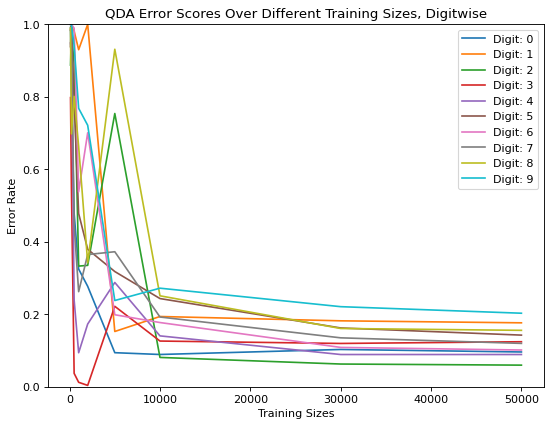

In [24]:
plt.figure(figsize=(8,6), dpi=80)
digitwise_sizewise_scores = digitwise_error_score_by_training_data(qda_predictions)
for j in range(digitwise_sizewise_scores.shape[1]):
    size_column = np.asarray(training_sizes)
    pts = np.hstack((size_column.reshape(9,1), digitwise_sizewise_scores[:,j].reshape(9,1)))
    plt.plot(pts[:,0], pts[:,1], label="Digit: " + str(j))
plt.legend(loc="upper right")
plt.title("QDA Error Scores Over Different Training Sizes, Digitwise")
plt.ylim(0,1)
plt.ylabel("Error Rate")
plt.xlabel("Training Sizes")

**8.3(d): Kaggle**

In [39]:
mnist_test_predictions = lda_predict(50000, mnist_training_data, mnist_training_labels, mnist_test_data, 10, False)

UnboundLocalError: local variable 'c_n_training_set' referenced before assignment

In [26]:
mnist_pd = pd.DataFrame(np.int64(mnist_test_predictions),columns=['Category'])
mnist_pd.index.name = 'Id'
mnist_pd.index += 1
mnist_pd.to_csv("mnist_test_predictions.csv")

**8.4: Spam or Ham?**

In [27]:
# load in data
spamham = io.loadmat("data/%s_data.mat" % "spam")
spamham_raw_training_data = spamham["training_data"].toarray() # toarray() necessary to get np array instead of sparse_ array
spamham_training_labels = spamham["training_labels"]
spamham_test_data = spamham["test_data"].toarray()

# shuffle the data and the labels
spamham_tuples = np.append(spamham_raw_training_data, spamham_training_labels, axis=1)
spamham_tuples_shuffled = np.random.permutation(spamham_tuples)

# divide 80% of data into training data, then assign remaining data as validation data
eighty_perc_cutoff = int(spamham_raw_training_data.shape[0] * 0.8)
spamham_training_data = spamham_tuples_shuffled[0:eighty_perc_cutoff, 0:-1]
spamham_training_labels = spamham_tuples_shuffled[0:eighty_perc_cutoff, -1]
spamham_validation_data = spamham_tuples_shuffled[eighty_perc_cutoff:, 0:-1]
spamham_validation_labels = spamham_tuples_shuffled[eighty_perc_cutoff:, -1]

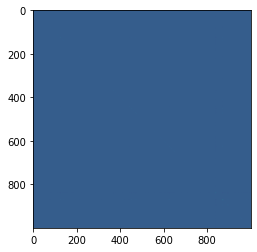

In [43]:
lda_spam_predictions = lda_predict(spamham_training_data.shape[0], spamham_training_data, spamham_training_labels, spamham_validation_data, 2)
qda_spam_predictions = qda_predict(spamham_training_data.shape[0], spamham_training_data, spamham_training_labels, spamham_validation_data, 2)

In [44]:
accuracy_score(spamham_validation_labels, lda_spam_predictions), accuracy_score(spamham_validation_labels, qda_spam_predictions)

(0.9603864734299516, 0.8985507246376812)

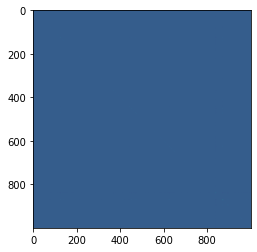

In [45]:
spamham_test_predictions = lda_predict(spamham_training_data.shape[0], spamham_training_data, spamham_training_labels, spamham_test_data, 2)

spamham_pd = pd.DataFrame(np.int64(spamham_test_predictions),columns=['Category'])
spamham_pd.index.name = 'Id'
spamham_pd.index += 1
spamham_pd.to_csv("spamham_test_predictions.csv")

In [46]:
mnist_pd

,Category
Id,
1,0
2,5
3,4
4,9
5,6
...,...
9996,4
9997,8
9998,8


In [47]:
spamham_pd

,Category
Id,
1,0
2,1
3,1
4,0
5,1
...,...
5853,1
5854,0
5855,1



KAGGLE SCORES

Kaggle Name: Dayne Tran

MNIST: 0.87230

Spam: 0.7917

For the code appendix, this is the featurize.py code

In [33]:
# # '''
# **************** PLEASE READ ***************

# Script that reads in spam and ham messages and converts each training example
# into a feature vector

# Code intended for UC Berkeley course CS 189/289A: Machine Learning

# Requirements:
# -scipy ('pip install scipy')

# To add your own features, create a function that takes in the raw text and
# word frequency dictionary and outputs a int or float. Then add your feature
# in the function 'def generate_feature_vector'

# The output of your file will be a .mat file. The data will be accessible using
# the following keys:
#     -'training_data'
#     -'training_labels'
#     -'test_data'

# Please direct any bugs to kevintee@berkeley.edu
# '''

# from collections import defaultdict
# import glob
# import re
# import scipy.io
# import numpy as np
# from sklearn.feature_extraction.text import CountVectorizer

# NUM_TRAINING_EXAMPLES = 5172
# NUM_TEST_EXAMPLES = 5857

# BASE_DIR = './'
# SPAM_DIR = 'spam/'
# HAM_DIR = 'ham/'
# TEST_DIR = 'test/'

# # ************* Features *************

# # Features that look for certain words
# def freq_pain_feature(text, freq):
#     return float(freq['pain'])

# def freq_private_feature(text, freq):
#     return float(freq['private'])

# def freq_bank_feature(text, freq):
#     return float(freq['bank'])

# def freq_money_feature(text, freq):
#     return float(freq['money'])

# def freq_drug_feature(text, freq):
#     return float(freq['drug'])

# def freq_spam_feature(text, freq):
#     return float(freq['spam'])

# def freq_prescription_feature(text, freq):
#     return float(freq['prescription'])

# def freq_creative_feature(text, freq):
#     return float(freq['creative'])

# def freq_height_feature(text, freq):
#     return float(freq['height'])

# def freq_featured_feature(text, freq):
#     return float(freq['featured'])

# def freq_differ_feature(text, freq):
#     return float(freq['differ'])

# def freq_width_feature(text, freq):
#     return float(freq['width'])

# def freq_other_feature(text, freq):
#     return float(freq['other'])

# def freq_energy_feature(text, freq):
#     return float(freq['energy'])

# def freq_business_feature(text, freq):
#     return float(freq['business'])

# def freq_message_feature(text, freq):
#     return float(freq['message'])

# def freq_volumes_feature(text, freq):
#     return float(freq['volumes'])

# def freq_revision_feature(text, freq):
#     return float(freq['revision'])

# def freq_path_feature(text, freq):
#     return float(freq['path'])

# def freq_meter_feature(text, freq):
#     return float(freq['meter'])

# def freq_memo_feature(text, freq):
#     return float(freq['memo'])

# def freq_planning_feature(text, freq):
#     return float(freq['planning'])

# def freq_pleased_feature(text, freq):
#     return float(freq['pleased'])

# def freq_record_feature(text, freq):
#     return float(freq['record'])

# def freq_out_feature(text, freq):
#     return float(freq['out'])

# # Features that look for certain characters
# def freq_semicolon_feature(text, freq):
#     return text.count(';')

# def freq_dollar_feature(text, freq):
#     return text.count('$')

# def freq_sharp_feature(text, freq):
#     return text.count('#')

# def freq_exclamation_feature(text, freq):
#     return text.count('!')

# def freq_para_feature(text, freq):
#     return text.count('(')

# def freq_bracket_feature(text, freq):
#     return text.count('[')

# def freq_and_feature(text, freq):
#     return text.count('&')

# # --------- Add your own feature methods ----------
# def example_feature(text, freq):
#     return int('example' in text)

# # Generates a feature vector
# def generate_feature_vector(text, freq):
#     feature = []
#     feature.append(freq_pain_feature(text, freq))
#     feature.append(freq_private_feature(text, freq))
#     feature.append(freq_bank_feature(text, freq))
#     feature.append(freq_money_feature(text, freq))
#     feature.append(freq_drug_feature(text, freq))
#     feature.append(freq_spam_feature(text, freq))
#     feature.append(freq_prescription_feature(text, freq))
#     feature.append(freq_creative_feature(text, freq))
#     feature.append(freq_height_feature(text, freq))
#     feature.append(freq_featured_feature(text, freq))
#     feature.append(freq_differ_feature(text, freq))
#     feature.append(freq_width_feature(text, freq))
#     feature.append(freq_other_feature(text, freq))
#     feature.append(freq_energy_feature(text, freq))
#     feature.append(freq_business_feature(text, freq))
#     feature.append(freq_message_feature(text, freq))
#     feature.append(freq_volumes_feature(text, freq))
#     feature.append(freq_revision_feature(text, freq))
#     feature.append(freq_path_feature(text, freq))
#     feature.append(freq_meter_feature(text, freq))
#     feature.append(freq_memo_feature(text, freq))
#     feature.append(freq_planning_feature(text, freq))
#     feature.append(freq_pleased_feature(text, freq))
#     feature.append(freq_record_feature(text, freq))
#     feature.append(freq_out_feature(text, freq))
#     feature.append(freq_semicolon_feature(text, freq))
#     feature.append(freq_dollar_feature(text, freq))
#     feature.append(freq_sharp_feature(text, freq))
#     feature.append(freq_exclamation_feature(text, freq))
#     feature.append(freq_para_feature(text, freq))
#     feature.append(freq_bracket_feature(text, freq))
#     feature.append(freq_and_feature(text, freq))

#     # --------- Add your own features here ---------
#     # Make sure type is int or float

#     return feature

# # This method generates a design matrix with a list of filenames
# # Each file is a single training example
# def generate_design_matrix(filenames):
#     corpus = []
#     design_matrix = []
#     for filename in filenames:
#         with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
#             try:
#                 text = f.read() # Read in text from file
#             except Exception as e:
#                 # skip files we have trouble reading.
#                 continue
#             text = text.replace('\r\n', ' ') # Remove newline character
#             corpus.append(text)
#             # words = re.findall(r'\w+', text)
#             # word_freq = defaultdict(int) # Frequency of all words
#             # for word in words:
#             #     word_freq[word] += 1

#             # # Create a feature vector
#             # feature_vector = generate_feature_vector(text, word_freq)
#             # design_matrix.append(feature_vector)
    
#     vectorizer = CountVectorizer()
#     X = vectorizer.fit_transform(corpus)
#     design_matrix = X.toarray()
#     return design_matrix

# def build_corpus(filenames):
#     corpus = []
#     for filename in filenames:
#         with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
#             try:
#                 text = f.read() # Read in text from file
#             except Exception as e:
#                 # skip files we have trouble reading.
#                 continue
#             text = text.replace('\r\n', ' ') # Remove newline character
#             corpus.append(text)
#     return corpus

# # ************** Script starts here **************
# # DO NOT MODIFY ANYTHING BELOW

# spam_filenames = glob.glob(BASE_DIR + SPAM_DIR + '*.txt')
# spam_corpus = build_corpus(spam_filenames)
# ham_filenames = glob.glob(BASE_DIR + HAM_DIR + '*.txt')
# ham_corpus = build_corpus(ham_filenames)

# training_corpus = ham_corpus + spam_corpus
# vectorizor = CountVectorizer(max_features=1000)
# X = vectorizor.fit_transform(training_corpus)
# training_design_matrix = X.toarray()

# # Important: the test_filenames must be in numerical order as that is the
# # order we will be evaluating your classifier
# test_filenames = [BASE_DIR + TEST_DIR + str(x) + '.txt' for x in range(NUM_TEST_EXAMPLES)]
# test_corpus = build_corpus(test_filenames)
# test_design_matrix = vectorizor.transform(test_corpus)

# # X = spam_design_matrix + ham_design_matrix
# Y = np.array([1]*len(ham_corpus) + [0]*len(spam_corpus)).reshape((-1, 1))

# file_dict = {}
# file_dict['training_data'] = X
# file_dict['training_labels'] = Y
# file_dict['test_data'] = test_design_matrix
# scipy.io.savemat('spam_data.mat', file_dict)
